In [1]:
import json

import random
import cv2 as cv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading data from nested json file

### Brute force

In [2]:
data = pd.read_json('training.json')
data.head()

,image,objects
0,{'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af...,"[{'bounding_box': {'minimum': {'r': 1057, 'c':..."
1,{'checksum': '1225a18efce159eddf7b0e80e0ea642c...,"[{'bounding_box': {'minimum': {'r': 734, 'c': ..."
2,{'checksum': '3eaf840523c30fdf38897ffa01e194eb...,"[{'bounding_box': {'minimum': {'r': 724, 'c': ..."
3,{'checksum': '8a111dffacfa433029492780b9535091...,"[{'bounding_box': {'minimum': {'r': 563, 'c': ..."
4,{'checksum': 'ccef403e971460b86444cca669e68ca1...,"[{'bounding_box': {'minimum': {'r': 618, 'c': ..."


### Data structure check

In [3]:
data['image'][0], data['objects'][0]

({'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af',
  'pathname': '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png',
  'shape': {'r': 1200, 'c': 1600, 'channels': 3}},
 [{'bounding_box': {'minimum': {'r': 1057, 'c': 1440},
    'maximum': {'r': 1158, 'c': 1540}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 868, 'c': 1303},
    'maximum': {'r': 971, 'c': 1403}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 578, 'c': 900},
    'maximum': {'r': 689, 'c': 1008}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 304, 'c': 611},
    'maximum': {'r': 408, 'c': 713}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 198, 'c': 881},
    'maximum': {'r': 312, 'c': 1003}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 193, 'c': 1480},
    'maximum': {'r': 293, 'c': 1574}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 257, 'c': 1384},
    'maximum': {'r'

### Img preview check

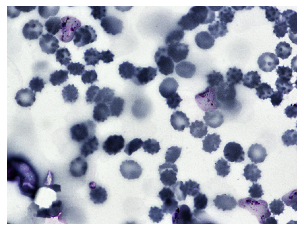

In [4]:
img_path ='images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png'

img = cv.imread(img_path, 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

### Read json one more time

In [5]:
f = open('training.json', "r") 
data = json.loads(f.read()) 
  
f.close() 

### flatten_json() to flatten nested elements in dictionary

In [6]:
def flatten_json(nested_json):
    """
        Flatten json object with nested keys into a single level.
        Args:
            nested_json: A nested json object.
        Returns:
            The flattened json object if successful, None otherwise.
    """
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out


### Reformat each line of json to get df friendly structure

In [7]:
new_json = {}

for idx, line in enumerate(data):
    new_json[idx] = flatten_json(line)

new_json[0]

{'image_checksum': '676bb8e86fc2dbf05dd97d51a64ac0af',
 'image_pathname': '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png',
 'image_shape_r': 1200,
 'image_shape_c': 1600,
 'image_shape_channels': 3,
 'objects_0_bounding_box_minimum_r': 1057,
 'objects_0_bounding_box_minimum_c': 1440,
 'objects_0_bounding_box_maximum_r': 1158,
 'objects_0_bounding_box_maximum_c': 1540,
 'objects_0_category': 'red blood cell',
 'objects_1_bounding_box_minimum_r': 868,
 'objects_1_bounding_box_minimum_c': 1303,
 'objects_1_bounding_box_maximum_r': 971,
 'objects_1_bounding_box_maximum_c': 1403,
 'objects_1_category': 'red blood cell',
 'objects_2_bounding_box_minimum_r': 578,
 'objects_2_bounding_box_minimum_c': 900,
 'objects_2_bounding_box_maximum_r': 689,
 'objects_2_bounding_box_maximum_c': 1008,
 'objects_2_category': 'red blood cell',
 'objects_3_bounding_box_minimum_r': 304,
 'objects_3_bounding_box_minimum_c': 611,
 'objects_3_bounding_box_maximum_r': 408,
 'objects_3_bounding_box_maximum_c': 7

### Dump new_json to str locally

In [8]:
json_string = json.dumps(new_json)
type(json_string)

str

### Read json using pandas, change `orient` param to index

In [9]:
df_train = pd.read_json(json_string, orient ='index')
df_train.shape

(1208, 1120)

## DF test loading

In [10]:
f = open('test.json', "r") 
data = json.loads(f.read()) 
  
f.close() 

new_json = {}

for idx, line in enumerate(data):
    new_json[idx] = flatten_json(line)

json_string = json.dumps(new_json)

df_test = pd.read_json(json_string, orient ='index')
df_test

,image_checksum,image_pathname,image_shape_r,image_shape_c,image_shape_channels,objects_0_bounding_box_minimum_r,objects_0_bounding_box_minimum_c,objects_0_bounding_box_maximum_r,objects_0_bounding_box_maximum_c,objects_0_category,...,objects_106_bounding_box_minimum_r,objects_106_bounding_box_minimum_c,objects_106_bounding_box_maximum_r,objects_106_bounding_box_maximum_c,objects_106_category,objects_107_bounding_box_minimum_r,objects_107_bounding_box_minimum_c,objects_107_bounding_box_maximum_r,objects_107_bounding_box_maximum_c,objects_107_category
0,eea3bfd6a929bcb06f9786667cd3fbb2,/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg,1383,1944,3,576,1744,708,1883,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2d85fc8ffdb875bb569878243437e4f5,/images/64985a1e-16bb-4016-a01c-c21a5b86e572.jpg,1383,1944,3,1048,1632,1170,1767,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f7c02b6247f3ccfcd4a22c1f06e0c72c,/images/c70894fa-50e8-4eed-a5a8-159a20153a49.jpg,1383,1944,3,979,960,1107,1095,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50634ef166ae993b4562b96f315ff6db,/images/abb72ce2-4193-4dd3-a34c-61c2ee22ccff.jpg,1383,1944,3,402,776,529,919,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74dd777a74e5a4b24aaee574a99e1459,/images/8db76867-671a-4488-a7b6-991e4dd2e05f.jpg,1383,1944,3,314,1054,433,1186,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,57d00c945b5e0b7995c75b9b4c57b579,/images/e26b88c6-5884-4b5c-94d7-ad780379c8ad.jpg,1383,1944,3,483,1380,602,1506,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,96a318d9a91b7ec403d80a4d2524ca50,/images/1b814efc-7bf9-40ae-8e13-49dc2c04732f.jpg,1383,1944,3,645,1541,757,1658,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,4a16a20311409e7c347b46ef96052735,/images/693da701-2020-404c-866d-b64c12da951d.jpg,1383,1944,3,530,177,662,316,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,de41f39ac7b6d9eb61502b9a55c27f8a,/images/b6fe541f-3be2-41a8-8124-757fc1ad875e.jpg,1383,1944,3,1004,1756,1151,1883,red blood cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data visualization

### DrawImg class

In [48]:
class DrawImg:
    
    def __init__ (self, row_index=0):
        
        if row_index < 0 or row_index > df_train.shape[0]-1:
            raise ValueError("wrong index! Try with numbers between 0 and " + str(df_train.shape[0]-1) + ".")
        
        self.categories = df_train[[x for x in df_train.columns if 'category' in x]]
        self.categories_set= self.find_categories()
        
        self.chosen_img_index = row_index
        self.chosen_img = df_train.loc[row_index, :]
        self.chosen_img_objects_count = self.categories.loc[row_index, :].count().sum()-1
        self.chosen_img_pathname = df_train.loc[row_index, 'image_pathname'].replace('/','',1)
        
        
        self.dict_with_colors = self.define_colors()
    
    
    def find_categories(self):
        
        final_set = []
        for i in self.categories:
            current  = list(set(self.categories[i]))
            final_set += current
        return set(final_set)
    
    
    def define_colors(self):
        _dict = {}

        _dict['gametocyte'] = (15, 152, 196)
        _dict['difficult'] = (202, 109, 34)
        _dict['ring'] = (20, 114, 254)
        _dict['schizont'] = (245, 53, 19)
        _dict['trophozoite']= (221, 13, 29)    
            
        _dict['red blood cell'] = (0,255,0)
        _dict['leukocyte'] = (0,255,0)
        
        return _dict
    
    
    def plot(self):
        plt.figure(figsize=(16,13))
        img = cv.imread(self.chosen_img_pathname, 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        for i in range(self.chosen_img_objects_count):
            cell_type = self.chosen_img['objects_' + str(i)  + '_category']
            p_1 =  int(self.chosen_img['objects_' + str(i) + '_bounding_box_minimum_c']), int(self.chosen_img['objects_' + str(i) + '_bounding_box_minimum_r'])
            p_2 =  int(self.chosen_img['objects_' + str(i) + '_bounding_box_maximum_c']), int(self.chosen_img['objects_' + str(i) + '_bounding_box_maximum_r'])
            img = cv.rectangle(img, p_1, p_2, self.dict_with_colors[cell_type],2)
            if cell_type not in {'red blood cell', 'leukocyte'}:
                img = cv.putText(img, cell_type.upper(), p_1, cv.FONT_HERSHEY_SIMPLEX, 1.5, self.dict_with_colors[cell_type],3)
        plt.imshow(img)
        plt.axis('off')
        plt.title("Image : " +  str(self.chosen_img_index))
        plt.show()

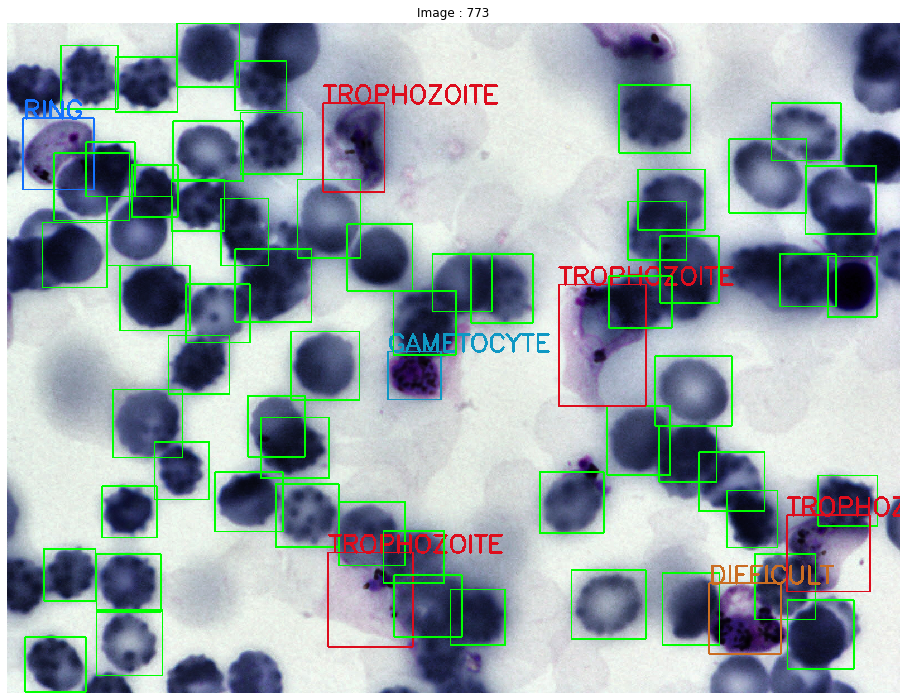

In [49]:
img = DrawImg(773).plot()

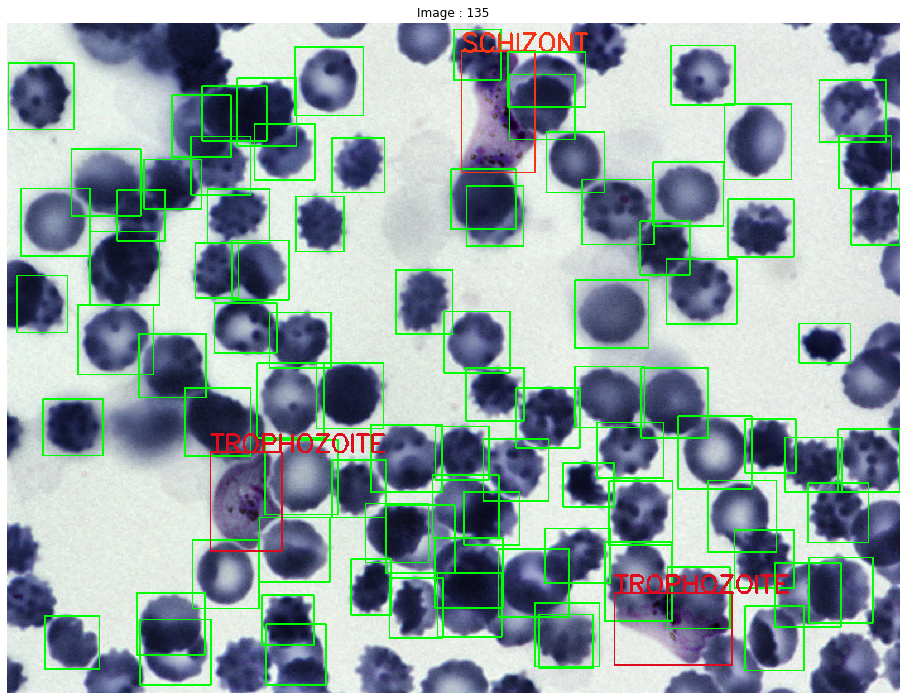

In [50]:
img = DrawImg(135).plot()